### FACE DETECTION IN IMAGES

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [3]:
img = cv2.imread("BOYSFACES.jpg")

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [6]:
print(faces)

[[ 886  369 1039 1039]
 [2256  745 1188 1188]]


In [7]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 8)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

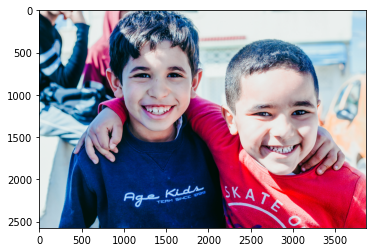

In [8]:
# ORIGINAL IMAGE
plt.imshow(cv2.cvtColor(cv2.imread("BOYSFACES.jpg"), cv2.COLOR_BGR2RGB))
plt.show()

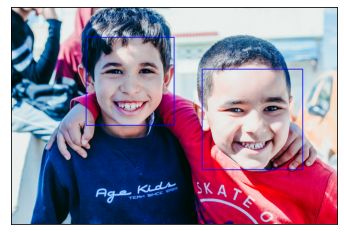

In [9]:
# FACE DETECTED IMAGE
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

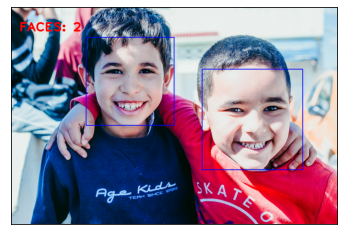

In [10]:
# FACE DETECTED WITH COUNT
text = "FACES: "+str(len(faces))
img = cv2.putText(img, text, (100,300), cv2.FONT_HERSHEY_PLAIN, 10, (0,0,255), 20)
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### FACE DETECTION IN VIDEO

In [17]:
# create a viddeo capture object and read from input file
cap = cv2.VideoCapture("facemoving.mp4")

# face detection in video
face_cascade1 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# read untile video is completed
while(True):
    # capture frame by frame
    ret, frame = cap.read()
    
    # convert video into gray video without color
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # detect faces in video
    faces = face_cascade1.detectMultiScale(gray, 1.3, 5)
    
    # draw rectangle boxes around the faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 3)
    
    # display resulting frame
    cv2.imshow("FRAME", frame)
    
    # press q on keyboard to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# release video capture object
cap.release()

# close all frames
cv2.destroyAllWindows()